titoli selezionati facenti parte di:
- settore tecnologico:  1) NVIDIA data l'esplosione dell'intelligenza artificiale
                        2) INTEL attualmente scontato ottima opportunità
- settore della sanità: 1) Johnosn e Johnson
                        2) PFIZER
- settore finanziario:  1) JPMorgan Chase (JPM)
                        2) Bank Of America (GS)

In [53]:
import pandas as pd
import numpy as np
import yfinance as yf # per il download dei dati storici dei titoli
import matplotlib.pyplot as plt # per il plot dei grafici
import datetime as dt # per la gestione delle date

In [54]:
IMAGE_PATH = 'images/'

In [55]:
#iniziamo a scaricare i dati storici dei titoli
start_date = dt.datetime(2014,5,31)
end_date = dt.datetime(2024,5,31)

tickers = ["NVDA", "INTC", "HII", "TDG", "JPM", "BAC"]
# scarichiamo i dati di tutti i titoli

data_df = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
#riordiniamo le colonne 
data_df = data_df[tickers]
data_df.head(10)

[*********************100%%**********************]  6 of 6 completed


Ticker,NVDA,INTC,HII,TDG,JPM,BAC
Date,,,,,,
2014-06-02,0.450743,20.772072,84.787079,116.768105,41.902775,12.456399
2014-06-03,0.448839,21.076866,84.854218,117.469086,42.092049,12.415581
2014-06-04,0.449314,21.031143,84.887802,117.542862,42.152618,12.415581
2014-06-05,0.451218,21.076866,85.458565,117.426048,42.871807,12.595163
2014-06-06,0.452884,21.465479,86.037781,120.260712,43.129208,12.725771
2014-06-09,0.453360,21.267363,86.658920,121.133850,43.469879,12.929838
2014-06-10,0.455740,21.518820,86.121719,120.162323,43.833263,12.995144
2014-06-11,0.461690,21.282608,84.795471,120.051643,43.356312,12.725771
2014-06-12,0.464546,21.305462,83.217415,118.260452,43.182209,12.587006


In [56]:
data_df.tail(10)

Ticker,NVDA,INTC,HII,TDG,JPM,BAC
Date,,,,,,
2024-05-16,94.351250,32.029999,254.834442,1286.319946,202.470001,38.982903
2024-05-17,92.471397,31.830000,254.277344,1291.949951,204.789993,39.052479
2024-05-20,94.772217,32.099998,254.267380,1312.760010,195.580002,38.585320
2024-05-21,95.378166,31.740000,252.446854,1336.839966,199.520004,39.410305
2024-05-22,94.942200,31.420000,253.173080,1326.189941,198.309998,39.519634
2024-05-23,103.790482,30.080000,251.571411,1330.719971,196.919998,38.933201
2024-05-24,106.460258,30.719999,254.874237,1350.310059,200.710007,39.459999
2024-05-28,113.891647,31.059999,251.442078,1317.939941,199.500000,39.082298
2024-05-29,114.815567,30.129999,247.015106,1312.290039,198.110001,38.485924


In [57]:
#piccola pulizia dei dati
data_df = data_df.dropna()

In [58]:
#creaimo una cartella per salvare i grafici
import os
def create_folder(folder):
    if not os.path.exists(folder):
        os.mkdir(folder)

create_folder(IMAGE_PATH)

In [59]:
#grafico dei dati
#costruiamo una lista di colori per i titoli in modo che siano sempre uguali
STOCK_PATH = IMAGE_PATH + "/stock_prices/"
create_folder(STOCK_PATH)
colors = ["red", "green", "blue", "black", "orange", "purple"]
data_df.plot(figsize=(12,8), color=colors)
plt.ylabel("Adj closed Price")
plt.title("Stock Prices")
plt.savefig(STOCK_PATH + "stock_prices.png")
plt.close()

In [60]:
#plottiamo tutti i titoli tranne NVDA
data_df.drop("TDG", axis=1).plot(figsize=(12,8), color=colors[0:3] + colors[4:6])
plt.ylabel("Adj closed Price")
plt.title("Stock Prices without TDG")
plt.savefig(STOCK_PATH + "stocksWithoutTDG.png")
plt.close()

2) RENDIMENTI

In [61]:
rsNetti_df = data_df.pct_change().dropna()
rsNetti_df.columns = [col + "_RSnetto" for col in rsNetti_df.columns]
rsNetti_df.head()

,NVDA_RSnetto,INTC_RSnetto,HII_RSnetto,TDG_RSnetto,JPM_RSnetto,BAC_RSnetto
Date,,,,,,
2014-06-03,-0.004224,0.014673,0.000792,0.006003,0.004517,-0.003277
2014-06-04,0.001060,-0.002169,0.000396,0.000628,0.001439,0.000000
2014-06-05,0.004238,0.002174,0.006724,-0.000994,0.017062,0.014464
2014-06-06,0.003692,0.018438,0.006778,0.024140,0.006004,0.010370
2014-06-09,0.001051,-0.009230,0.007219,0.007260,0.007899,0.016036


In [62]:
rsLordi_df = rsNetti_df + 1
rsLordi_df.columns = [col.replace("RSnetto", "RSlordo") for col in rsLordi_df.columns]
rsLordi_df.head()

,NVDA_RSlordo,INTC_RSlordo,HII_RSlordo,TDG_RSlordo,JPM_RSlordo,BAC_RSlordo
Date,,,,,,
2014-06-03,0.995776,1.014673,1.000792,1.006003,1.004517,0.996723
2014-06-04,1.001060,0.997831,1.000396,1.000628,1.001439,1.000000
2014-06-05,1.004238,1.002174,1.006724,0.999006,1.017062,1.014464
2014-06-06,1.003692,1.018438,1.006778,1.024140,1.006004,1.010370
2014-06-09,1.001051,0.990770,1.007219,1.007260,1.007899,1.016036


In [63]:
rsLogaritmici_df = np.log(rsLordi_df)
rsLogaritmici_df.columns = [col.replace("RSlordo", "Rlog") for col in rsLogaritmici_df.columns]
rsLogaritmici_df.head()

,NVDA_Rlog,INTC_Rlog,HII_Rlog,TDG_Rlog,JPM_Rlog,BAC_Rlog
Date,,,,,,
2014-06-03,-0.004233,0.014567,0.000792,0.005985,0.004507,-0.003282
2014-06-04,0.001060,-0.002172,0.000396,0.000628,0.001438,0.000000
2014-06-05,0.004229,0.002172,0.006701,-0.000994,0.016918,0.014361
2014-06-06,0.003685,0.018270,0.006755,0.023853,0.005986,0.010316
2014-06-09,0.001050,-0.009272,0.007193,0.007234,0.007868,0.015909


In [64]:
cum_df = rsLordi_df.cumprod()
cum_df.columns = [col.replace("RSlordo", "Rcomposito") for col in cum_df.columns]
cum_df.head()

,NVDA_Rcomposito,INTC_Rcomposito,HII_Rcomposito,TDG_Rcomposito,JPM_Rcomposito,BAC_Rcomposito
Date,,,,,,
2014-06-03,0.995776,1.014673,1.000792,1.006003,1.004517,0.996723
2014-06-04,0.996832,1.012472,1.001188,1.006635,1.005962,0.996723
2014-06-05,1.001056,1.014673,1.007920,1.005635,1.023126,1.011140
2014-06-06,1.004752,1.033382,1.014751,1.029911,1.029269,1.021625
2014-06-09,1.005808,1.023844,1.022077,1.037388,1.037399,1.038008


RENDIMENTO COMPOSTO ANNUO PER OGNI TITOLO

In [65]:
delta = end_date - start_date
delta.days

3653

In [66]:
annualized_return = cum_df.iloc[-1] ** (365/delta.days) - 1
#rename the series indexes
annualized_return.index = [col.replace("Rcomposito", "annualizedReturn") for col in annualized_return.index]
annualized_return

NVDA_annualizedReturn    0.732781
INTC_annualizedReturn    0.038066
HII_annualizedReturn     0.114060
TDG_annualizedReturn     0.274381
JPM_annualizedReturn     0.168631
BAC_annualizedReturn     0.119051
Name: 2024-05-30 00:00:00, dtype: float64

Grafico dei ritorni logaritmici e dei ritorni semplici

In [67]:
RETURNS_PATH = IMAGE_PATH + "/returns/"
create_folder(RETURNS_PATH)

In [68]:
def plot_netReturns_vs_logReturns(netReturns, logReturns, tickertitle):
    #netReturns is a series of net returns
    #logReturns is a series of log returns
    plt.subplot(2,1,1)
    plt.title(tickertitle + " Net Returns vs Log Returns")
    netReturns.plot(figsize=(10,6), color="blue")
    plt.ylabel("Net Returns")
    plt.subplot(2,1,2)
    logReturns.plot(figsize=(10,6), color="green")
    plt.ylabel("Log Returns")
    plt.show()


In [69]:
#siccome i grafici non escono molto smooth, possiamo mensilizzare i ritorni
rs_netti_mensili = rsNetti_df.groupby(pd.Grouper(freq="M")).last()
rs_log_mensili = rsLogaritmici_df.groupby(pd.Grouper(freq="M")).last()
print(rs_netti_mensili.isna().sum(), rs_log_mensili.isna().sum())

NVDA_RSnetto    0
INTC_RSnetto    0
HII_RSnetto     0
TDG_RSnetto     0
JPM_RSnetto     0
BAC_RSnetto     0
dtype: int64 NVDA_Rlog    0
INTC_Rlog    0
HII_Rlog     0
TDG_Rlog     0
JPM_Rlog     0
BAC_Rlog     0
dtype: int64


C:\Users\Riccardo\AppData\Local\Temp\ipykernel_14900\792554769.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rs_netti_mensili = rsNetti_df.groupby(pd.Grouper(freq="M")).last()
C:\Users\Riccardo\AppData\Local\Temp\ipykernel_14900\792554769.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rs_log_mensili = rsLogaritmici_df.groupby(pd.Grouper(freq="M")).last()


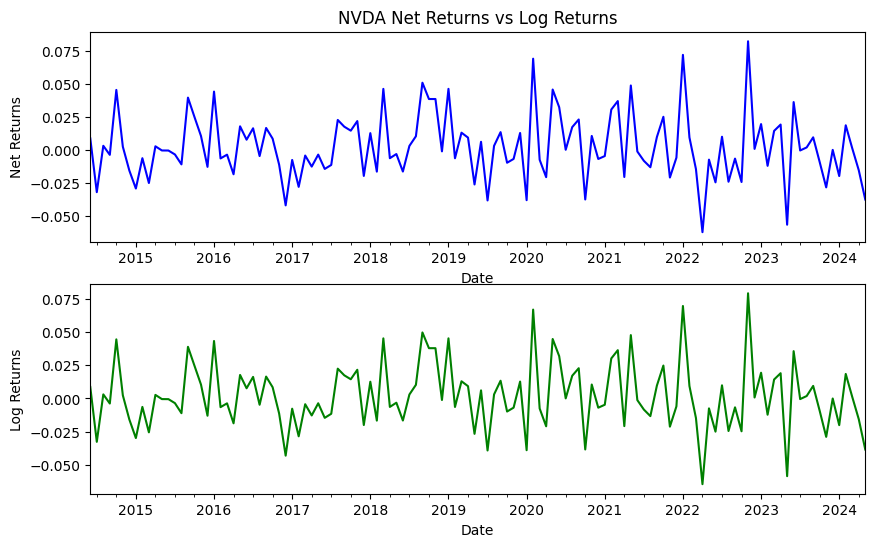

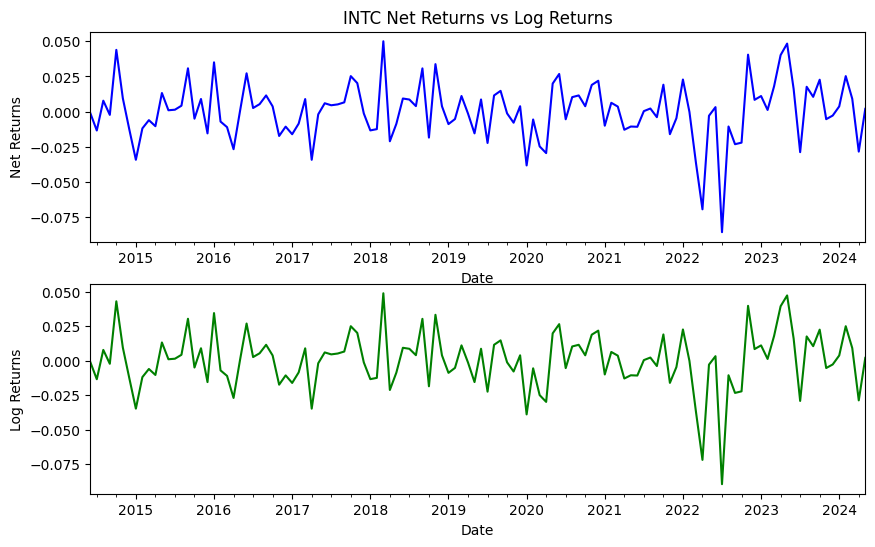

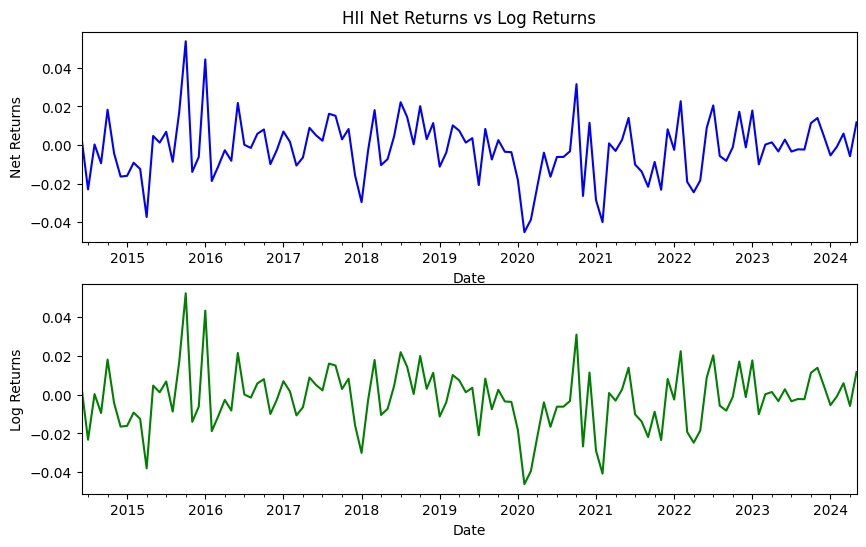

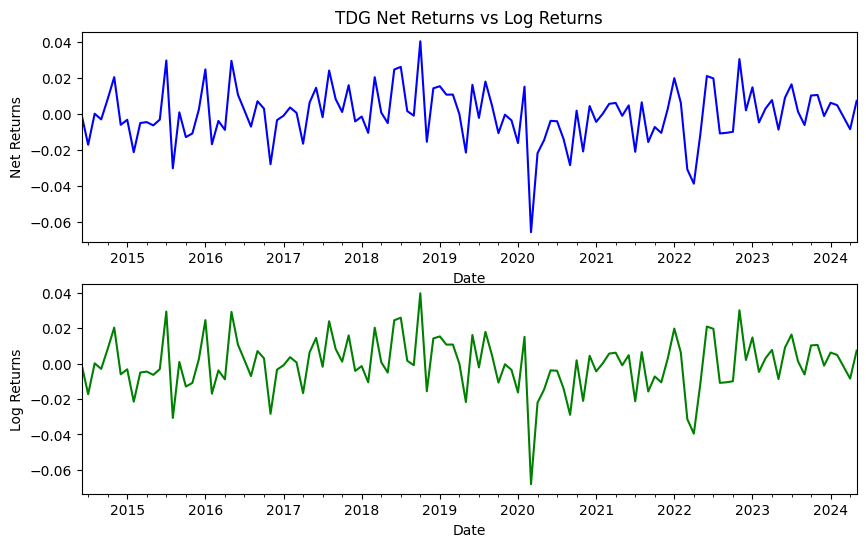

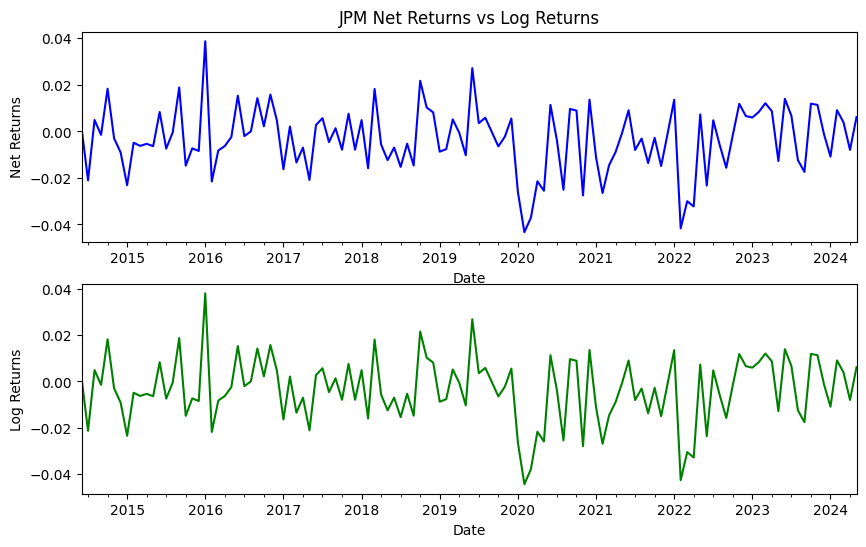

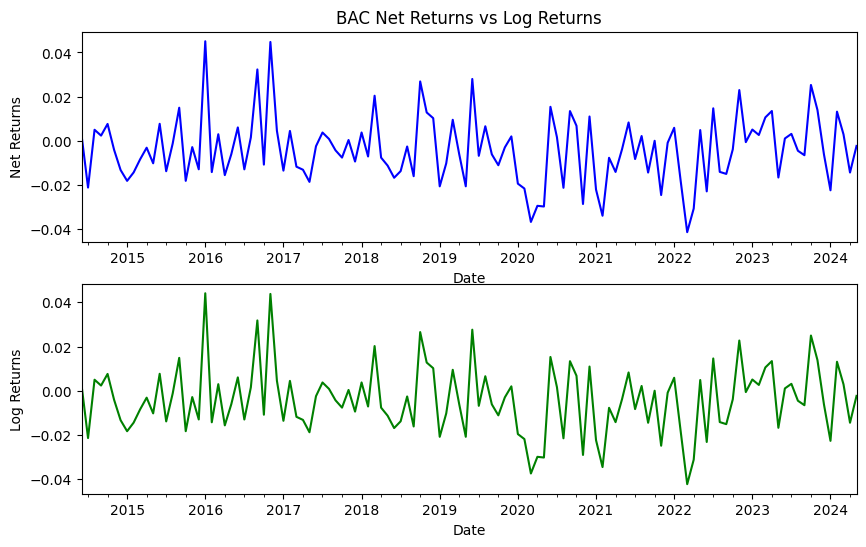

In [70]:
for ticker in tickers:
    plot_netReturns_vs_logReturns(rs_netti_mensili[ticker + "_RSnetto"], 
                                  rs_log_mensili[ticker + "_Rlog"], 
                                  ticker)

In [71]:
def plotCumulativeReturns_vs_simpleReturns(cumReturns, simpleReturns, tickertitle, count):
    #cumReturns is a series of cumulative returns
    #simpleReturns is a series of simple returns
    plt.subplot(2,1,1)
    plt.title(tickertitle + " Cumulative Returns vs Simple Returns")
    cumReturns.plot(figsize=(10,6), color="blue")
    #we add the mean of the series as a horizontal line
    plt.axhline(cumReturns.mean(), color="red", linestyle="--", linewidth=2)
    plt.ylabel("Cumulative Returns")
    plt.subplot(2,1,2)
    simpleReturns.plot(figsize=(10,6), color="green")
    plt.axhline(simpleReturns.mean(), color="red", linestyle="--", linewidth=2)
    plt.ylabel("Simple Returns")
    plt.savefig( RETURNS_PATH + "cumReturnsVsSimpleReturns" + str(count) + ".png")
    #suppress plot output
    plt.close()

In [72]:
cumReturns_mensili = cum_df.groupby(pd.Grouper(freq="M")).last()

C:\Users\Riccardo\AppData\Local\Temp\ipykernel_14900\1154752585.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cumReturns_mensili = cum_df.groupby(pd.Grouper(freq="M")).last()


In [73]:
for i, ticker in enumerate(tickers):
    plotCumulativeReturns_vs_simpleReturns(cumReturns_mensili[ticker + "_Rcomposito"], 
                                           rs_netti_mensili[ticker + "_RSnetto"], 
                                           ticker,
                                           i)

ISTOGRAMMI E DISPERSIONE

In [74]:
HISTOGRAPH_PATH = IMAGE_PATH + "/histograms/"
create_folder(HISTOGRAPH_PATH)

In [75]:
#funzione per plottare gli istogrammi di due titoli
cmap = plt.get_cmap("turbo")
def plot_histograms(df, label1, label2, title):
    plt.figure(figsize=(12,8))
    plt.hist(df[[label1, label2]], bins=25, density=True, 
             edgecolor='black', color=[cmap(0.8), cmap(0.2)])
    plt.title(title)
    plt.savefig(HISTOGRAPH_PATH + title + ".png")
    plt.legend([label1, label2], fontsize=15, loc="upper right")
    plt.xlabel("Net Return")
    plt.ylabel("Frequency")
    plt.close()

In [53]:
#istogramma dei titoli tecnologici
plot_histograms(rs_netti_mensili, "NVDA_RSnetto", 
                "INTC_RSnetto", 
                "Net Return Histogram NVDA_INTC")
#dispersione dei titoli tecnologici
rsNetti_df[["NVDA_RSnetto", "INTC_RSnetto"]].std()

NVDA_RSnetto    0.029824
INTC_RSnetto    0.021047
dtype: float64

In [77]:
#istogramma dei titoli bellici
plot_histograms(rs_netti_mensili, "HII_RSnetto", 
                "TDG_RSnetto", 
                "Net Return Histogram HII_TDG")
#dispersione dei titoli farmaceutici
rsNetti_df[["HII_RSnetto", "TDG_RSnetto"]].std()

HII_RSnetto    0.017221
TDG_RSnetto    0.020850
dtype: float64

In [78]:
#istogramma dei titoli bancari
plot_histograms(rs_netti_mensili, "JPM_RSnetto", 
                "BAC_RSnetto", 
                "Net Return Histogram JPM_BAC")
#dispersione dei titoli bancari
rsNetti_df[["JPM_RSnetto", "BAC_RSnetto"]].std()

JPM_RSnetto    0.016972
BAC_RSnetto    0.019474
dtype: float64